## Fuzzy logic
Fuzzy logic is a mathematical system that deals with reasoning and decision-making based on imprecise or vague information. Unlike traditional logic, which uses binary values of true or false, fuzzy logic allows for the use of degrees of truth, where something can be partially true or partially false.

Fuzzy logic is used to model complex systems where there is uncertainty or ambiguity in the input data, and it has applications in fields such as control systems, artificial intelligence, and image processing. It uses linguistic variables, which are words or phrases that describe a characteristic of a system, such as "hot" or "cold," and membership functions, which define the degree to which a value belongs to a particular linguistic variable.

Overall, fuzzy logic provides a more flexible and nuanced approach to decision-making and reasoning than traditional logic, and it has become an important tool in various areas of research and industry.

<center><img src="https://i.ibb.co/K90FZ8c/The-architecture-of-the-fuzzy-logic-system.png"></center>

## Variables for this basic control system

**Error** (e): The difference between the desired height and the actual height of the satellite.

**Change in error** (ce/dt): The rate of change of the error over time.

**Distance to target altitude** (d): The distance between the current altitude and the target altitude.

**Velocity** (v): The speed at which the satellite is moving.

**Acceleration** (a): The rate of change of velocity over time.

**Angle** (θ): The angle of the satellite with respect to the horizon.

**Angular velocity** (ω): The rate of change of the angle over time.

**Fuel level**: The amount of fuel remaining on the satellite.

**Control signal** (u): The output of the fuzzy logic controller, which represents the amount of force or thrust that needs to be applied to the satellite.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

In [2]:
# Ranges where input variables are defined.
x_E = np.arange(-500,500,1)
x_CiE = np.arange(-50, 50, 1)
x_D = np.arange(-1000, 1000, 1)
x_V = np.arange(0, 500, 1)
x_A = np.arange(-10, 10, 0.1)
x_An = np.arange(-180, 180, 1)
x_W = np.arange(-10, 10, 0.1)
x_F = np.arange(0, 100, 1)


# Ranges where output variable is defined.
x_O = np.arange(0, 100, 1);

In [3]:
def gaussian_mf(x, mean, sigma):
    """
    Create a Gaussian membership function with the given mean and sigma.

    :param x: The input value.
    :param mean: The mean of the Gaussian.
    :param sigma: The standard deviation of the Gaussian.
    :return: The membership value.
    """
    return np.exp(-np.power(x - mean, 2.) / (2. * np.power(sigma, 2.)))

In [4]:
def membership(x, xmf, xx, zero_outside_x=True):
    """
    Compute the membership function for a variable given its input range and membership function values.

    Parameters:
    x (array-like): 1-D array of input values for the membership function.
    xmf (array-like): 1-D array of membership function values corresponding to the input values.
    xx (array-like): 1-D array of input values for which the membership function needs to be computed.
    zero_outside_x (bool, optional): Whether to set the membership function values to zero outside the input range x. 
                                      Defaults to True.

    Returns:
    array-like: 1-D array of membership function values corresponding to the input values xx.
    """
    if not zero_outside_x:
        # If zero_outside_x is False, set the left and right values to None to allow extrapolation
        kwargs = (None, None)
    else:
        # If zero_outside_x is True, set the left and right values to 0.0 to clip the output values to zero
        kwargs = (0.0, 0.0)
        
    # Interpolate the membership function values for the input values xx
    return np.interp(xx, x, xmf, left=kwargs[0], right=kwargs[1])

In [5]:
def defuzz(x, LFX):
    """
    Compute the defuzzified output of a fuzzy logic system using the Gaussian defuzzification method.

    Parameters:
    x (np.ndarray): A one-dimensional NumPy array representing the universe of discourse for the fuzzy output variable.
    LFX (np.ndarray): A one-dimensional NumPy array representing the membership values of the output variable for each value in `x`.

    Returns:
    float: The defuzzified output of the fuzzy logic system.
    """
    # Flatten the input arrays to ensure they are one-dimensional
    x = x.ravel()
    LFX = LFX.ravel()
    
    # Check that the length of the input arrays is the same
    n = len(x)
    if n != len(LFX):
        print("The number of values is not equal to the number of fuzzy set memberships.")
    
    # If there is only one value in the input arrays, return the defuzzified value
    if len(x) == 1:
        return x[0] * LFX[0] / np.maximum(LFX[0], np.finfo(float).eps).astype(float)
    
    # Compute the centroid of the fuzzy output using the Gaussian defuzzification method
    # Compute the numerator and denominator of the centroid formula
    num = np.sum(x * LFX)
    den = np.sum(LFX)
    
    # Handle the case where the denominator is zero
    if den == 0:
        return np.mean(x)
    
    # Compute and return the centroid using the numerator and denominator
    return num / den

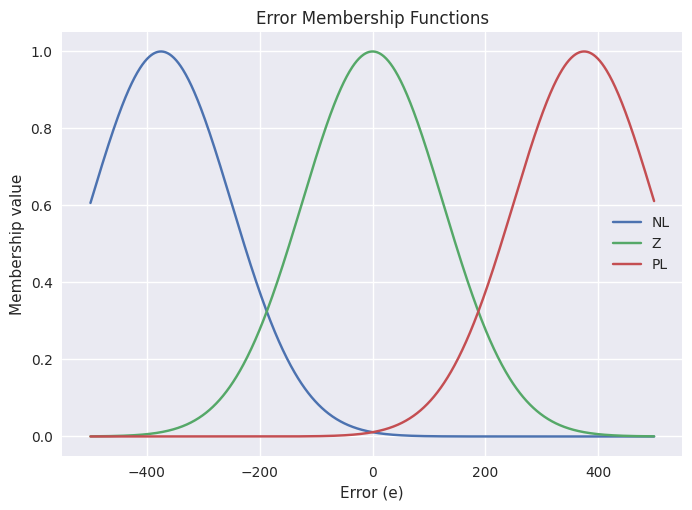

In [6]:
# Define the Gaussian membership functions for the three fuzzy sets
E_mean_NL = -375
E_sigma_NL = 125
E_mf_NL = gaussian_mf(x_E, E_mean_NL, E_sigma_NL)

E_mean_Z = 0
E_sigma_Z = 125
E_mf_Z = gaussian_mf(x_E, E_mean_Z, E_sigma_Z)

E_mean_PL = 375
E_sigma_PL = 125
E_mf_PL = gaussian_mf(x_E, E_mean_PL, E_sigma_PL)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_E, E_mf_NL, label='NL')
plt.plot(x_E, E_mf_Z, label='Z')
plt.plot(x_E, E_mf_PL, label='PL')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Error (e)')
plt.ylabel('Membership value')
plt.title("Error Membership Functions")

# Display the plot
plt.show()

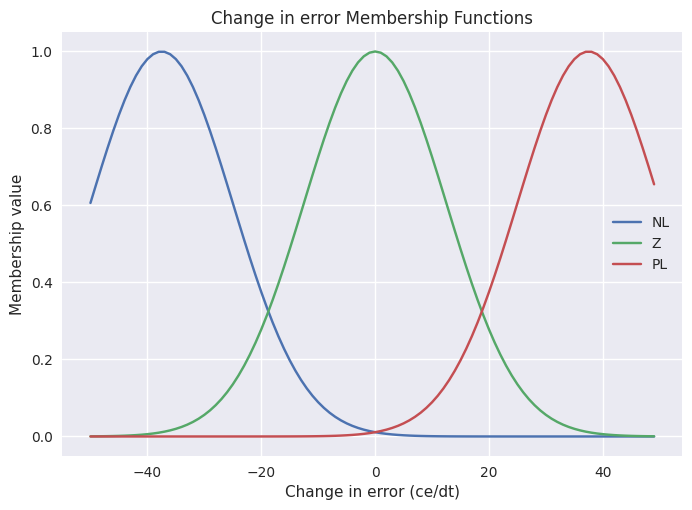

In [7]:
# Define the Gaussian membership functions for the three fuzzy sets
CiE_mean_NL = -37.5
CiE_sigma_NL = 12.5
CiE_mf_NL = gaussian_mf(x_CiE, CiE_mean_NL, CiE_sigma_NL)

CiE_mean_Z = 0
CiE_sigma_Z = 12.5
CiE_mf_Z = gaussian_mf(x_CiE, CiE_mean_Z, CiE_sigma_Z)

CiE_mean_PL = 37.5
CiE_sigma_PL = 12.5
CiE_mf_PL = gaussian_mf(x_CiE, CiE_mean_PL, CiE_sigma_PL)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_CiE, CiE_mf_NL, label='NL')
plt.plot(x_CiE, CiE_mf_Z, label='Z')
plt.plot(x_CiE, CiE_mf_PL, label='PL')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Change in error (ce/dt)')
plt.ylabel('Membership value')
plt.title("Change in error Membership Functions")

# Display the plot
plt.show()

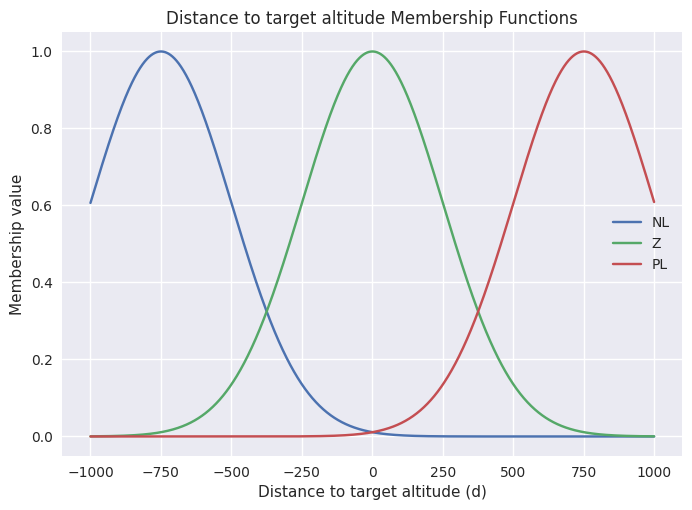

In [8]:
# Define the Gaussian membership functions for the three fuzzy sets
D_mean_NL = -750
D_sigma_NL = 250
D_mf_NL = gaussian_mf(x_D, D_mean_NL, D_sigma_NL)

D_mean_Z = 0
D_sigma_Z = 250
D_mf_Z = gaussian_mf(x_D, D_mean_Z, D_sigma_Z)

D_mean_PL = 750
D_sigma_PL = 250
D_mf_PL = gaussian_mf(x_D, D_mean_PL, D_sigma_PL)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_D, D_mf_NL, label='NL')
plt.plot(x_D, D_mf_Z, label='Z')
plt.plot(x_D, D_mf_PL, label='PL')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Distance to target altitude (d)')
plt.ylabel('Membership value')
plt.title("Distance to target altitude Membership Functions")

# Display the plot
plt.show()

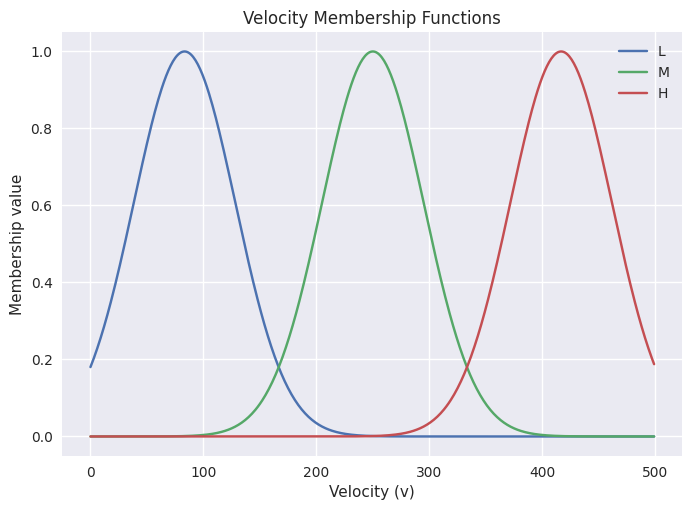

In [9]:
# Define the Gaussian membership functions for the three fuzzy sets
V_mean_L = 83.3
V_sigma_L = 45
V_mf_L = gaussian_mf(x_V, V_mean_L, V_sigma_L)

V_mean_M = 250
V_sigma_M = 45
V_mf_M = gaussian_mf(x_V, V_mean_M, V_sigma_M)

V_mean_H = 416.7
V_sigma_H = 45
V_mf_H = gaussian_mf(x_V, V_mean_H, V_sigma_H)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_V, V_mf_L, label='L')
plt.plot(x_V, V_mf_M, label='M')
plt.plot(x_V, V_mf_H, label='H')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Velocity (v)')
plt.ylabel('Membership value')
plt.title("Velocity Membership Functions")

# Display the plot
plt.show()

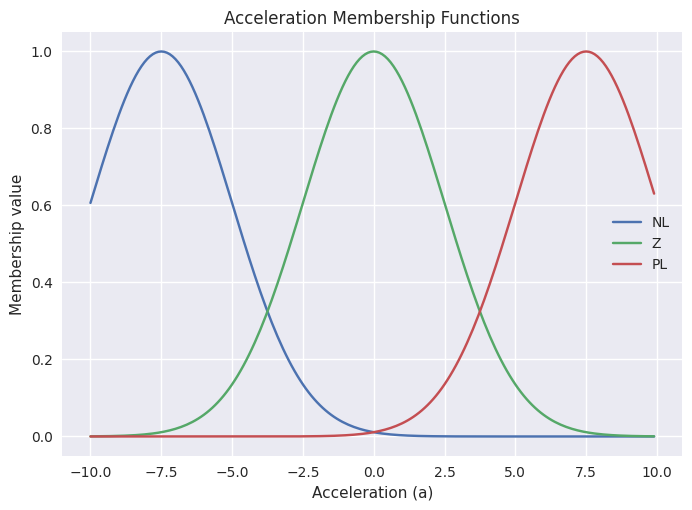

In [10]:
# Define the Gaussian membership functions for the three fuzzy sets
a_mean_NL = -7.5
a_sigma_NL = 2.5
a_mf_NL = gaussian_mf(x_A, a_mean_NL, a_sigma_NL)

a_mean_Z = 0
a_sigma_Z = 2.5
a_mf_Z = gaussian_mf(x_A, a_mean_Z, a_sigma_Z)

a_mean_PL = 7.5
a_sigma_PL = 2.5
a_mf_PL = gaussian_mf(x_A, a_mean_PL, a_sigma_PL)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_A, a_mf_NL, label='NL')
plt.plot(x_A, a_mf_Z, label='Z')
plt.plot(x_A, a_mf_PL, label='PL')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Acceleration (a)')
plt.ylabel('Membership value')
plt.title("Acceleration Membership Functions")

# Display the plot
plt.show()

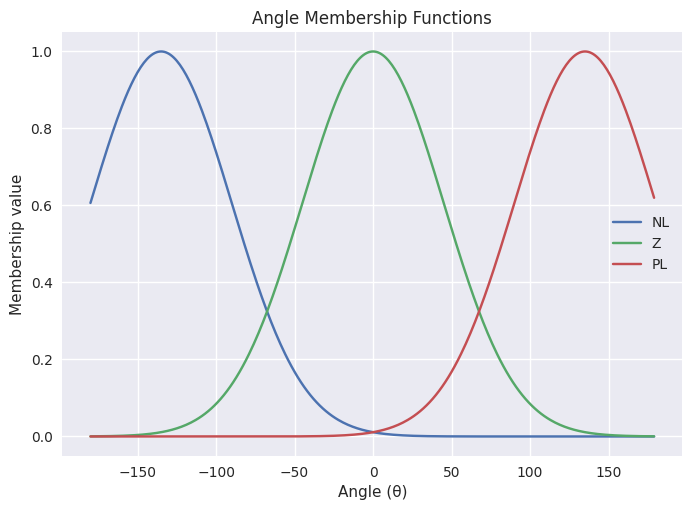

In [11]:
# Define the Gaussian membership functions for the three fuzzy sets
theta_mean_NL = -135
theta_sigma_NL = 45
theta_mf_NL = gaussian_mf(x_An, theta_mean_NL, theta_sigma_NL)

theta_mean_Z = 0
theta_sigma_Z = 45
theta_mf_Z = gaussian_mf(x_An, theta_mean_Z, theta_sigma_Z)

theta_mean_PL = 135
theta_sigma_PL = 45
theta_mf_PL = gaussian_mf(x_An, theta_mean_PL, theta_sigma_PL)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_An, theta_mf_NL, label='NL')
plt.plot(x_An, theta_mf_Z, label='Z')
plt.plot(x_An, theta_mf_PL, label='PL')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Angle (θ)')
plt.ylabel('Membership value')
plt.title("Angle Membership Functions")

# Display the plot
plt.show()

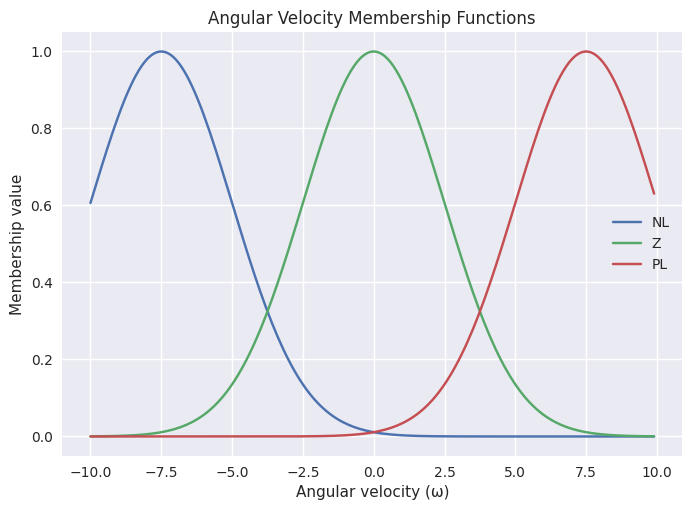

In [12]:
# Define the Gaussian membership functions for the three fuzzy sets
omega_mean_NL = -7.5
omega_sigma_NL = 2.5
omega_mf_NL = gaussian_mf(x_W, omega_mean_NL, omega_sigma_NL)

omega_mean_Z = 0
omega_sigma_Z = 2.5
omega_mf_Z = gaussian_mf(x_W, omega_mean_Z, omega_sigma_Z)

omega_mean_PL = 7.5
omega_sigma_PL = 2.5
omega_mf_PL = gaussian_mf(x_W, omega_mean_PL, omega_sigma_PL)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_W, omega_mf_NL, label='NL')
plt.plot(x_W, omega_mf_Z, label='Z')
plt.plot(x_W, omega_mf_PL, label='PL')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Angular velocity (ω)')
plt.ylabel('Membership value')
plt.title("Angular Velocity Membership Functions")

# Display the plot
plt.show()

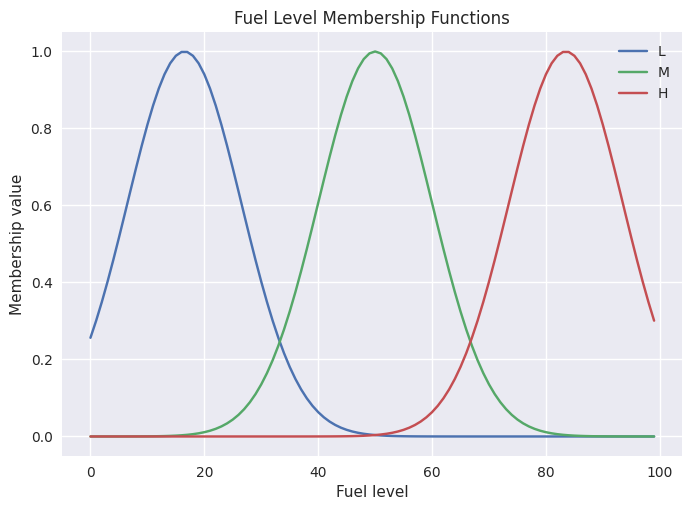

In [13]:
# Define the Gaussian membership functions for the three fuzzy sets
fuel_mean_L = 16.5
fuel_sigma_L = 10
fuel_mf_L = gaussian_mf(x_F, fuel_mean_L, fuel_sigma_L)

fuel_mean_M = 50
fuel_sigma_M = 10
fuel_mf_M = gaussian_mf(x_F, fuel_mean_M, fuel_sigma_M)

fuel_mean_H = 83.5
fuel_sigma_H = 10
fuel_mf_H = gaussian_mf(x_F, fuel_mean_H, fuel_sigma_H)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_F, fuel_mf_L, label='L')
plt.plot(x_F, fuel_mf_M, label='M')
plt.plot(x_F, fuel_mf_H, label='H')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Fuel level')
plt.ylabel('Membership value')
plt.title("Fuel Level Membership Functions")

# Display the plot
plt.show()

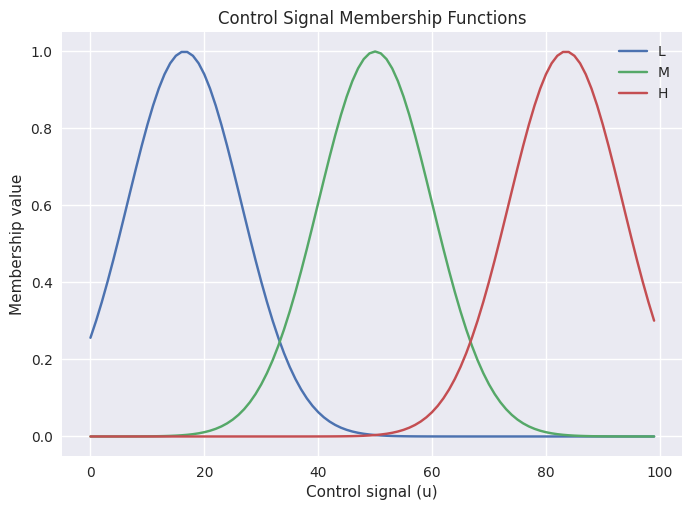

In [14]:
# Define the Gaussian membership functions for the three fuzzy sets
o_mean_L = 16.5
o_sigma_L = 10
o_mf_L = gaussian_mf(x_O, o_mean_L, o_sigma_L)

o_mean_M = 50
o_sigma_M = 10
o_mf_M = gaussian_mf(x_O, o_mean_M, o_sigma_M)

o_mean_H = 83.5
o_sigma_H = 10
o_mf_H = gaussian_mf(x_O, o_mean_H, o_sigma_H)

# Plot the Gaussian membership functions for the three fuzzy sets
plt.plot(x_O, o_mf_L, label='L')
plt.plot(x_O, o_mf_M, label='M')
plt.plot(x_O, o_mf_H, label='H')

# Add a legend and axis labels
plt.legend()
plt.xlabel('Control signal (u)')
plt.ylabel('Membership value')
plt.title("Control Signal Membership Functions")

# Display the plot
plt.show()

In [15]:
# Get input variables
#input_E = input("Error (-500, 500)")
#input_CiE = input("Change in error (-50, 50)")
#input_D = input("Distance to target altitude (-1000, 1000)")
#input_V = input("Velocity (0, 500)")
#input_A = input("Acceleration (-10, 10)")
#input_An = input("Angle (-180, 180)")
#input_W = input("Angular velocity (-10, 10)")
#input_F = input("Fuel (0, 100)")

input_E = -300
input_CiE = -20
input_D = -550
input_V = 100
input_A = 1
input_An = 18
input_W = 1
input_F = 40

In [16]:
# Membership values for Error
E_nl = membership(x_E, E_mf_NL, input_E)
E_z = membership(x_E, E_mf_Z, input_E)
E_pl = membership(x_E, E_mf_PL, input_E)

# Membership values for Change in error
CiE_nl = membership(x_CiE, CiE_mf_NL, input_E)
CiE_z = membership(x_CiE, CiE_mf_Z, input_E)
CiE_pl = membership(x_CiE, CiE_mf_PL, input_E)

# Membership values for Distance to target altitude
D_nl = membership(x_D, D_mf_NL, input_D)
D_z = membership(x_D, D_mf_Z, input_D)
D_pl = membership(x_D, D_mf_PL, input_D)

# Membership values for Velocity
V_l = membership(x_V, V_mf_L, input_V)
V_m = membership(x_V, V_mf_M, input_V)
V_h = membership(x_V, V_mf_H, input_V)

# Membership values for Acceleration
A_nl = membership(x_A, a_mf_NL, input_A)
A_z = membership(x_A, a_mf_NL, input_A)
A_pl = membership(x_A, a_mf_NL, input_A)

# Membership values for Angle
An_nl = membership(x_An, theta_mf_NL, input_An)
An_z = membership(x_An, theta_mf_Z, input_An)
An_pl = membership(x_An, theta_mf_PL, input_An)

# Membership values for Angular velocity
W_nl = membership(x_W, omega_mf_NL, input_W)
W_z = membership(x_W, omega_mf_Z, input_W)
W_pl = membership(x_W, omega_mf_PL, input_W)

# Membership values for Fuel
F_l = membership(x_F, fuel_mf_L, input_F)
F_m = membership(x_F, fuel_mf_M, input_F)
F_h = membership(x_F, fuel_mf_H, input_F)

## Rule Base
* If the error is small and the change in error is small, then the control signal should be small.
* If the error is large and the change in error is small, then the control signal should be medium.
* If the error is large and the change in error is large, then the control signal should be large.
* If the distance to target altitude is small and the velocity is small, then the control signal should be small.
* If the distance to target altitude is medium and the velocity is medium, then the control signal should be medium.
* If the distance to target altitude is large and the velocity is large, then the control signal should be large.
* If the fuel level is low, then the control signal should be small.
* If the fuel level is medium, then the control signal can be medium.
* If the fuel level is high, then the control signal can be large.
* If the angle is small and the angular velocity is small, then the control signal should be small.
* If the angle is medium and the angular velocity is medium, then the control signal should be medium.
* If the angle is large and the angular velocity is large, then the control signal should be large.

> These rules are basic and exemplary and can be applied in more detail.

In [17]:
# Rules
rule1 = np.minimum(np.minimum(E_nl, CiE_nl), o_mf_L)
rule2 = np.minimum(np.minimum(E_pl, CiE_nl), o_mf_M)
rule3 = np.minimum(np.minimum(E_pl, CiE_pl), o_mf_H)

rule4 = np.minimum(np.minimum(D_nl, V_l), o_mf_L)
rule5 = np.minimum(np.minimum(D_z, V_m), o_mf_M)
rule6 = np.minimum(np.minimum(D_pl, V_h), o_mf_H)

rule7 = np.minimum(F_l, o_mf_L)
rule8 = np.minimum(F_m, o_mf_M)
rule9 = np.minimum(F_h, o_mf_H)

rule10 = np.minimum(np.minimum(An_nl, V_l), o_mf_L)
rule11 = np.minimum(np.minimum(An_z, V_m), o_mf_M)
rule12 = np.minimum(np.minimum(An_pl, V_h), o_mf_H)

In [18]:
# Compute the maximum of the first three arrays separately
out_l_temp = np.maximum(rule1, rule4, rule7)
out_m_temp = np.maximum(rule2, rule5, rule8)
out_h_temp = np.maximum(rule3, rule6, rule9)

# Compute the maximum of the resulting arrays and the fourth array
out_l = np.maximum(out_l_temp, rule10)
out_m = np.maximum(out_m_temp, rule11)
out_h = np.maximum(out_h_temp, rule12)

# Compute the absolute fuzzy output
out_f = np.maximum(out_l, np.maximum(out_m, out_h))

In [19]:
defuzzification_result = defuzz(x_O, out_f) * 3 / 2

In [20]:
# Membership of output in low, medium and hight fuzzy sets
result_l = membership(x_O, o_mf_L, defuzzification_result)
result_m = membership(x_O, o_mf_M, defuzzification_result)
result_h = membership(x_O, o_mf_H, defuzzification_result)

# print results
print(result_l)
print(result_m)
print(result_h)

0.5825335711532992
0.06945836244472846
1.1169411580999356e-07


In [21]:
# Initialize the force with a value of 100
force = 100

# Calculate the lower and upper force values based on the defuzzification results
force_l = force - (result_l * defuzzification_result)
force_h = force + (result_h * defuzzification_result)

# Find the average of the lower and upper force values
force = (force_l + force_h) / 2

# Determine the final force value based on the middle defuzzification result
if result_l > result_h:
    force = force + (result_m * defuzzification_result) / 3
else:
    force = force - (result_m * defuzzification_result) / 3

# Print the final force value
print("According to the current conditions, the amount of force or thrust that should be applied to the satellite should be ", force)

According to the current conditions, the amount of force or thrust that should be applied to the satellite should be  92.7888155198408
